In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from math import sqrt
def sciPrintR(val, relErr, name=None):
    if name != None:
        print(name, val, "+-", val * relErr, "(", relErr * 100., "%)")
    else:
        print(val, "+-", val * relErr, "(", relErr * 100., "%)")
        
def sciPrintD(val, dErr, name=None):
    if name != None:
        print(name, val, "+-", dErr, "(", (dErr/val) * 100., "%)")
    else:
        print(val, "+-", dErr, "(", (dErr/val) * 100., "%)")
        
def prodErrorR(errors):
    errors = np.array(errors)
    return np.sqrt((errors**2).sum())

def prodErrorR_degs(errors):
    errors = np.array([(deg**2) * (error**2) for deg, error in errors])
    return np.sqrt(errors.sum())

def eval_mnk(x, y):
    assert len(x) == len(y)
    n = len(x)
    b = ((x*y).mean() - (x).mean() * (y).mean()) / ((x**2).mean() - (x).mean()**2)
    a = (y).mean() - b * (x).mean()
    sigma_b = 1./sqrt(n) * sqrt(((y**2).mean() - (y).mean()**2)/((x**2).mean() - (x).mean()**2) - b**2)
    sigma_a = sigma_b*sqrt((x**2).mean() - (x).mean()**2)
    return a, b, sigma_a, sigma_b

def plt_lab_figure(X_max, Y_max):
    fig = plt.figure(figsize=(8, 16))
    ax = fig.add_subplot(111)
    k_off = 1.05
    x_minor_ticks = np.linspace(0, X_max * k_off + 0.0001, 125) # 104 
    x_major_ticks = np.array([x_minor_ticks[i] for i in range(0, x_minor_ticks.size, 20)])
    y_minor_ticks = np.linspace(0, Y_max * k_off + 0.0001, 248) # 4822
    y_major_ticks = np.array([y_minor_ticks[i] for i in range(0, y_minor_ticks.size, 20)])


    ax.set_xticks(x_major_ticks)
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.set_yticks(y_minor_ticks, minor=True)
    ax.grid(which='minor', alpha=0.4, linestyle='-')
    ax.grid(which='major', alpha=0.7, linestyle='-')


    plt.xlim((0, X_max * k_off))
    plt.ylim((0, Y_max * k_off))

In [21]:
P = np.array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80], dtype=float)
T = np.array([
    [3946, 3944, 3957, 4004],
    [2896, 2760, 2686, 2650],
    [2126, 2084, 2106, 2031],
    [1586, 1678, 1736, 1650],
    [1428, 1344, 1450, 1422],
    [2403, 2438, 2514, 2422],
    [2163, 2138, 2176, 2134],
    [1914, 1897, 1958, 1921],
    [1696, 1719, 1776, 1732],
    [1548, 1553, 1612, 1556],
    [1485, 1466, 1477, 1466],
    [1377, 1341, 1316, 1350],
    [1219, 1284, 1295, 1281],
    [1260, 1200, 1168, 1213],
    [1161, 1169, 1151, 1150]
], dtype = float) / 100
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=float) * 0.5 * 0.001  # m^3

In [22]:
def make_me_plot(P, M, T, R, L):
    Q = M / T.mean(axis = 1) 
    
    plt_lab_figure(P.max(), Q.max() * 1e3)
    plt.xlabel("Давление, мм")
    plt.ylabel("Расход, $\\frac{л}{сек}$")
    plt.scatter(P, Q * 1e3)

    p = np.poly1d(np.polyfit(P[:-3], Q[:-3] * 1e3, deg=1))

    grid = np.linspace(0, P.max(), 1000)
    plt.plot(grid, list(map(p, grid)), color="red")
    plt.grid()
    plt.show()

    
    k, t = np.polyfit(Q[:-3],P[:-3] * 0.2 * 9.80665, deg=1)
    mnk_a, mnk_b, sigma_a, sigma_b = eval_mnk(Q[:-3],P[:-3] * 0.2 * 9.80665)
    
    
    print("dP, mm = ", P[0])
    print("dP, Pascal = ", P[0]  * 0.2 * 9.80665)
    print("dV, m^3 = ", M[0])
    print("dT, sec = ", T[0].mean())
    print("Q, m^3/sec = ", M[0] / T[0].mean())
    print("k = ", k)
    nu =  (k) * (np.pi * (R**4) / 8 / L)
    nu_RE = prodErrorR_degs([(1, sigma_b/k), (4, 0.05/(2*R)/1000.), (1, 0.001/L)])
    print(t, k, nu)
    sciPrintR(nu, nu_RE, "nu = ")
    
    lamnd_exp = 3 * nu  * sqrt(8.31*293*np.pi) / ( 101000 * sqrt(8*0.029))
    lamnd_exp_RE = prodErrorR_degs([(1, nu_RE), (0.5, 2./293)])
    sciPrintR(lamnd_exp, lamnd_exp_RE, "lambd_exp = ")
    
    d = sqrt((8.31*293*sqrt(8*0.029))/(sqrt(2)*np.pi*3*nu*sqrt(8.31*293*np.pi)*6*10**23))
    d_RE = prodErrorR_degs([(0.5, nu_RE), (0.25, 2./293)])
    sciPrintR(d, d_RE, "d = ")
    
    ro_air = 1.2047
    re = Q[-3] * ro_air / (np.pi * R * nu)
    re_RE = prodErrorR([0.01/0.5, 0.05/(2*R)/1000.])
    sciPrintR(re, re_RE, "Re = ")
    
    
    uT = 460
    lambd = 1e-7
    nu_theory = 1./3. * ro_air * uT * lambd
    print("nu_theory = ", nu_theory)
    
    return nu

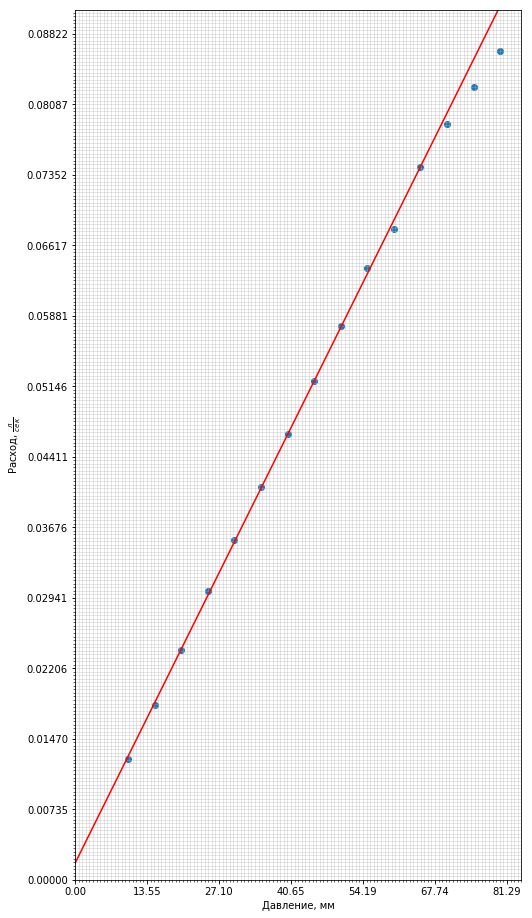

dP, mm =  10.0
dP, Pascal =  19.6133
dV, m^3 =  0.0005
dT, sec =  39.6275
Q, m^3/sec =  1.26175004732e-05
k =  1754280.68872
-2.96727987153 1754280.68872 1.79557424665e-05
nu =  1.79557424665e-05 +- 9.50902534925e-07 ( 5.29581295064 %)
lambd_exp =  9.684306248e-08 +- 5.13926692447e-09 ( 5.30679926146 %)
d =  3.0558449675018975e-10 +- 8.10837790834e-12 ( 2.65339963073 %)
Re =  885.225360478 +- 21.1924170404 ( 2.39401377169 %)
nu_theory =  1.847206666666667e-05


In [23]:
nu_1 = make_me_plot(P, M, T, R = 3.80 / 2. * 0.001, L = 0.50)

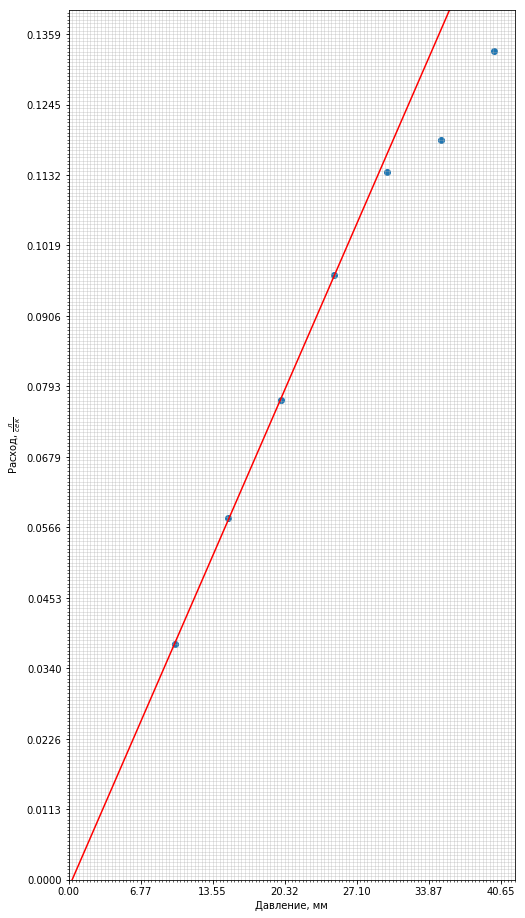

dP, mm =  10.0
dP, Pascal =  19.6133
dV, m^3 =  0.001
dT, sec =  26.405
Q, m^3/sec =  3.78716152244e-05
k =  498335.008686
0.658337063465 498335.008686 2.40571072714e-05
nu =  2.40571072714e-05 +- 8.75421425918e-07 ( 3.63893054988 %)
lambd_exp =  1.29750354068e-07 +- 4.74224660143e-09 ( 3.65490070182 %)
d =  2.640044813672845e-10 +- 4.82455082116e-12 ( 1.82745035091 %)
Re =  647.52477252 +- 14.1824095785 ( 2.19024972949 %)
nu_theory =  1.847206666666667e-05


In [24]:
P = np.array([10, 15, 20, 25, 30, 35, 40], dtype=float)
T = np.array([
    [2628, 2631, 2603, 2700],
    [1708, 1728, 1710, 1733],
    [1285, 1281, 1293, 1333],
    [1065, 1032,  995, 1025],
    [1308, 1290, 1322, 1355],
    [1269, 1244, 1259, 1276],
    [1124, 1140, 1110, 1135]
], dtype = float) / 100
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
M = np.array([2, 2, 2, 2, 3, 3, 3], dtype=float) * 0.5 * 0.001  # m^3

nu_2 = make_me_plot(P, M, T, R = 5.6 / 2 * 0.001, L = 0.50)

In [25]:
# 1.8 и 2.4 * 1e-5

In [26]:
ro_air = 1.225  # kg / m^3
Reinolds = ro * u * r / nu

NameError: name 'ro' is not defined